### TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import itnput_data
import matplotlib.pyplot as plt

In [56]:
node1 = tf.constant(3.0)
node2 = tf.constant(4.0)
print(node1, node2)

Tensor("Const_6:0", shape=(), dtype=float32) Tensor("Const_7:0", shape=(), dtype=float32)


In [57]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


In [58]:
node3 = tf.add(node1, node2)
print(node3)
print(sess.run(node3))

Tensor("Add_1:0", shape=(), dtype=float32)
7.0


In [59]:
# Placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
node = a + b
print(sess.run(node, {a:3.0, b:4.0}))
print(sess.run(node, {a:[3.0,6.0], b:[4.0, 5.0]}))

7.0
[  7.  11.]


In [60]:
next_node = node * 3.0
print(sess.run(next_node,{a:3.0, b:4.0}))

21.0


In [61]:
# Adding variables
W = tf.Variable([-.3], tf.float32)
b = tf.Variable([0.3], tf.float32)
x = tf.placeholder(tf.float32)

net_input = W * x + b

init  = tf.global_variables_initializer()
sess.run(init)

print(sess.run(net_input, {x:[1., 2., 5.]}))

[ 0.         -0.30000001 -1.20000005]


In [62]:
y = tf.placeholder(tf.float32)

error = y - net_input
cost = tf.reduce_sum(tf.square(error))

print(sess.run(cost, {x:[1.,2.,5.], y:[0.,0.,1.]}))

4.93


In [63]:
# Gradient descent 
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cost)

In [64]:
sess.run(init)
for i in range(1000):
    sess.run(train, {x:[1.,2.,5.], y:[0.,0.,1.]})
    
print(sess.run([W,b]))

[array([ 0.26923048], dtype=float32), array([-0.38461441], dtype=float32)]


### tf.contrib.learn

In [65]:
features = [tf.contrib.layers.real_valued_column("x",dimension=1)]
print(features)

[_RealValuedColumn(column_name='x', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)]


In [66]:
estimator = tf.contrib.learn.LinearRegressor(feature_columns = features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0f54472a20>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}


In [67]:
x = np.array([1.0,2.0,3.0,4.0])
y = np.array([0.0,-1.0,-2.0,-3.0])

In [68]:
input_fn = tf.contrib.learn.io.numpy_input_fn({"x":x}, y, batch_size=4,num_epochs=1000)

In [69]:
estimator.fit(input_fn = input_fn,steps=1000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpl5h9cnvu/model.ckpt.
INFO:tensorflow:loss = 3.5, step = 1
INFO:tensorflow:global_step/sec: 651.421
INFO:tensorflow:loss = 0.0555537, step = 101 (0.155 sec)
INFO:tensorflow:global_step/sec: 772.628
INFO:tensorflow:loss = 0.00968093, step = 201 (0.132 sec)
INFO:tensorflow:global_step/sec: 678.413
INFO:tensorflow:loss = 0.00234577, step = 301 (0.147 sec)
INFO:tensorflow:global_step/sec: 891.421
INFO:tensorflow:loss = 0.000565562, step = 401 (0.110 sec)
INFO:tensorflow:global_step/sec: 883.381
INFO:tensorflow:loss = 9.83197e-05, step = 501 (0.113 sec)
INFO:tensorflow:glo

LinearRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7f0f54472ef0>, 'feature_columns': [_RealValuedColumn(column_name='x', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [70]:
print(estimator.evaluate(input_fn=input_fn))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-05-17-17:45:07
INFO:tensorflow:Restoring parameters from /tmp/tmpl5h9cnvu/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-05-17-17:45:08
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 1.38972e-08
{'loss': 1.3897152e-08, 'global_step': 1000}


### MNIST Using TensorFlow

In [2]:
# Preparing the data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:

print('Training images: ', mnist.train.images.shape)
print('Training labels: ', mnist.train.labels.shape)

Training images:  (55000, 784)
Training labels:  (55000, 10)


In [4]:
x = tf.placeholder(tf.float32,[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x,W) + b)


In [5]:
y_ = tf.placeholder(tf.float32,[None,10])

# Cross entropy
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

In [7]:
# Perform training
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [8]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [9]:
accuracy_train_values = [0]
loss_train_values = []
accuracy_test_values = [0]
loss_test_values = []

for _ in range(1000):
    x_b, y_b = mnist.train.next_batch(100)
    train_data = {x:x_b,y_:y_b}
    sess.run(train_step, feed_dict=train_data)
    
    # Compute training accuracy
    accuracy_train, loss_train = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    accuracy_train_values.append(accuracy_train)
    loss_train_values.append(loss_train)
    
    # Compute test accuracy
    test_data={x: mnist.test.images, y_: mnist.test.labels}    
    accuracy_test, loss_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    accuracy_test_values.append(accuracy_test)
    loss_test_values.append(loss_test)

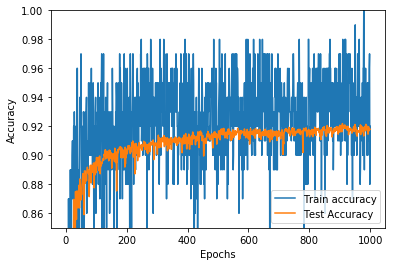

In [10]:
# Evaluation
plt.plot(accuracy_train_values,label='Train accuracy')
plt.plot(accuracy_test_values, label='Test Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.85,1])
plt.show()



### Go Deeper

In [81]:
K = 200
L = 100
M = 60
N = 30

W1 = tf.Variable(tf.truncated_normal([28*28,K],stddev=0.1))
b1 = tf.Variable(tf.zeros([K]))

W2 = tf.Variable(tf.truncated_normal([K,L],stddev=0.1))
b2 = tf.Variable(tf.zeros([L]))

W3 = tf.Variable(tf.truncated_normal([L,M],stddev=0.1))
b3 = tf.Variable(tf.zeros([M]))

W4 = tf.Variable(tf.truncated_normal([M,N],stddev=0.1))
b4 = tf.Variable(tf.zeros([N]))

W5 = tf.Variable(tf.truncated_normal([N,10],stddev=0.1))
b5 = tf.Variable(tf.zeros([10]))

In [91]:
# Output functions
Y1 = tf.nn.sigmoid(tf.matmul(x,W1)+ b1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1,W2)+ b2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2,W3)+ b3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3,W4)+ b4)
y = tf.nn.softmax(tf.matmul(Y4,W5)+ b5)



In [99]:
y_ = tf.placeholder(tf.float32,[None,10])

# Cross entropy
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

# Perform training
train_step = tf.train.GradientDescentOptimizer(0.003).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [93]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [100]:
accuracy_train_values = [0]
loss_train_values = []
accuracy_test_values = [0]
loss_test_values = []

for _ in range(10000):
    batch_x, batch_y = mnist.train.next_batch(100)
    train_data = {x:batch_x,y_:batch_y}
    sess.run(train_step, feed_dict=train_data)
    
    # Compute training accuracy
    accuracy_train, loss_train = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    accuracy_train_values.append(accuracy_train)
    loss_train_values.append(loss_train)
    
    # Compute test accuracy
    test_data={x: mnist.test.images, y_: mnist.test.labels}    
    accuracy_test, loss_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    accuracy_test_values.append(accuracy_test)
    loss_test_values.append(loss_test)
    

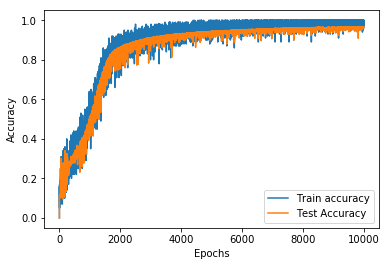

In [103]:
# Evaluation
plt.plot(accuracy_train_values,label='Train accuracy')
plt.plot(accuracy_test_values, label='Test Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### ReLu

In [104]:
# Output functions
Y1 = tf.nn.relu(tf.matmul(x,W1)+ b1)
Y2 = tf.nn.relu(tf.matmul(Y1,W2)+ b2)
Y3 = tf.nn.relu(tf.matmul(Y2,W3)+ b3)
Y4 = tf.nn.relu(tf.matmul(Y3,W4)+ b4)
y = tf.nn.softmax(tf.matmul(Y4,W5)+ b5)

In [ ]:
accuracy_train_values = [0]
loss_train_values = []
accuracy_test_values = [0]
loss_test_values = []

for _ in range(10000):
    batch_x, batch_y = mnist.train.next_batch(100)
    train_data = {x:batch_x,y_:batch_y}
    sess.run(train_step, feed_dict=train_data)
    
    # Compute training accuracy
    accuracy_train, loss_train = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    accuracy_train_values.append(accuracy_train)
    loss_train_values.append(loss_train)
    
    # Compute test accuracy
    test_data={x: mnist.test.images, y_: mnist.test.labels}    
    accuracy_test, loss_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    accuracy_test_values.append(accuracy_test)
    loss_test_values.append(loss_test)

In [ ]:
# Evaluation
plt.plot(accuracy_train_values,label='Train accuracy')
plt.plot(accuracy_test_values, label='Test Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Deep MNIST Using CNN

In [6]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

In [7]:
# Stride =1  | Zero padding for same output size | Patch of 2 x 2
def conv2d(x, W):
    return tf.nn.conv2d(x, W , strides = [1, 1, 1, 1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize= [1, 2, 2, 1], strides = [1, 2, 2, 1], padding='SAME')

In [8]:
# Layer 1
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32,[None,10])

W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Layer 2
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [9]:
# Dense connected layer
W_fc1 = weight_variable([7 * 7* 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [10]:
# Drop out layer
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [11]:
# Final layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2



In [12]:
# Training
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= y_conv, labels = y_)
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(y_conv,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict = {x:batch[0], 
                                                        y_:batch[1], 
                                                        keep_prob:1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        
    print('test accuracy %g' % accuracy.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

            

InvalidArgumentError: Incompatible shapes: [50] vs. [200]
	 [[Node: Equal = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax, ArgMax_1)]]

Caused by op 'Equal', defined at:
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-c08b274a388b>", line 4, in <module>
    correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(y_conv,1))
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 672, in equal
    result = _op_def_lib.apply_op("Equal", x=x, y=y, name=name)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [50] vs. [200]
	 [[Node: Equal = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax, ArgMax_1)]]


In [14]:
cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
      batch = mnist.train.next_batch(50)
      if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x: batch[0], y_: batch[1], keep_prob: 1.0})
        print('step %d, training accuracy %g' % (i, train_accuracy))
      train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))


InvalidArgumentError: Incompatible shapes: [200] vs. [50]
	 [[Node: Equal_1 = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax_2, ArgMax_3)]]

Caused by op 'Equal_1', defined at:
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-152fcf14ec86>", line 4, in <module>
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 672, in equal
    result = _op_def_lib.apply_op("Equal", x=x, y=y, name=name)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [200] vs. [50]
	 [[Node: Equal_1 = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax_2, ArgMax_3)]]
